#Project 1: Car Price

#Objectives
After completing this lab you will be able to:

Handle missing values
Correct data formatting
Standardize and normalize data

#Table of contents
Identify and handle missing values
Identify missing values
Deal with missing values
Correct data format
Data standardization
Data normalization (centering/scaling)
Binning
Indicator variable

In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Instead of using pyodide to download the data, use the requests library
import requests

def download(url, filename):
    """Downloads a file from a URL and saves it to a local file."""
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    with open(filename, "wb") as f:
        f.write(response.content)

In [3]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [4]:
download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df = pd.read_csv(file_name, names = headers)

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# Identify and handle missing values


In [8]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
**Evaluating for Missing Data
The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:

.isnull()
.notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.**

In [9]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False




```
# This is formatted as code
```

# Count missing values in each column
Using a for loop in Python, you can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the data set. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam


#Deal with missing data
How should you deal with missing data?

Drop data
a. Drop the whole row
b. Drop the whole column
Replace data
a. Replace it by mean
b. Replace it by frequency
c. Replace it based on other functions

##Replace by mean:

"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean



In [12]:
##Calculate the mean value for the "normalized-losses" column ##
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [13]:
##Replace "NaN" with mean value in "normalized-losses" column##
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<ipython-input-13-39aaec7c81e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)


In [15]:
##Calculate the mean value for the "bore" column##
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [16]:
##Replace "NaN" with the mean value in the "bore" column##
df["bore"].replace(np.nan, avg_bore, inplace=True)

<ipython-input-16-9cd047eeb656>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bore"].replace(np.nan, avg_bore, inplace=True)


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "stroke" column with the mean value.</b>
</div>

In [19]:
#Calculate the mean value for the "horsepower" column#

avg_horsepower=df['horsepower'].astype('float').mean(axis=0)
print("Average of horsepower:", avg_horsepower)


Average of horsepower: 104.25615763546799


In [20]:
##Replace "NaN" with the mean value in the "horsepower" column##
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<ipython-input-20-1464ef39e093>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


In [21]:
#<h4>Calculate the mean value for "peak-rpm" column</h4>
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average of peak rpm:", avg_peakrpm)

Average of peak rpm: 5125.369458128079


In [26]:
#<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

<ipython-input-26-c7a34d53bf16>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


##Replace by frequency:

"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur

In [23]:
#To see which values are present in a particular column, we can use the ".value_counts()" method:
df['num-of-doors'].value_counts()

,count
num-of-doors,
four,114
two,89


In [24]:
#You can see that four doors is the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:
df['num-of-doors'].value_counts().idxmax()

'four'

In [25]:
#The replacement procedure is very similar to what you have seen previously:
#replace the missing 'num-of-doors' values by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace=True)

<ipython-input-25-d724cb14ca33>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace(np.nan, "four", inplace=True)


##Drop the whole row:

"price": 4 missing data, simply delete the whole row
Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.

In [27]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [28]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correct data format
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, you use:
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [29]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [30]:
#<h4>Convert data types to proper format</h4>
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [31]:
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


<b>Wonderful!</b>

Now you finally obtained the cleansed data set with no missing values and with all data in its proper format.


## Data Standardization
<p>
You usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)
</p>
    
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

In [32]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [33]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


Question #2:
According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".

In [34]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [35]:
# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li>
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>

<b>Example</b>
<p>To demonstrate normalization, say you want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>


In [36]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

Question #3:
According to the example above, normalize the column "height".

In [37]:
df['height'] = df['height']/df['height'].max()

## Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.</p>

<p>Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


Text(0.5, 1.0, 'horsepower bins')

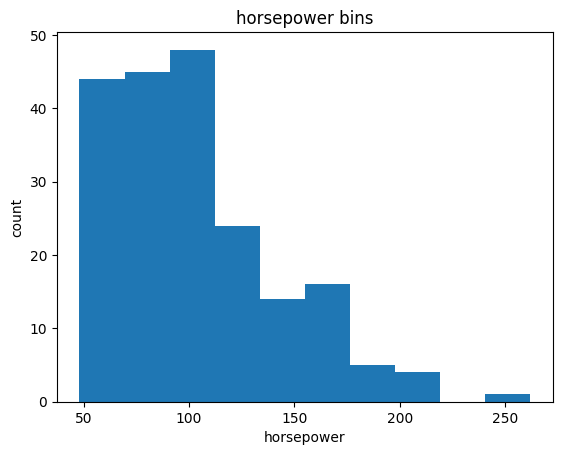

In [39]:
# Convert data to correct format:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#<p>Find 3 bins of equal size bandwidth by using Numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).</p>
<p>Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).</p>
<p>Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.</p>


In [40]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [41]:
group_names = ['Low', 'Medium', 'High']

In [42]:
#Apply the function "cut" to determine what each value of `df['horsepower']` belongs to.

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [43]:
df["horsepower-binned"].value_counts()

,count
horsepower-binned,
Low,153
Medium,43
High,5


Text(0.5, 1.0, 'horsepower bins')

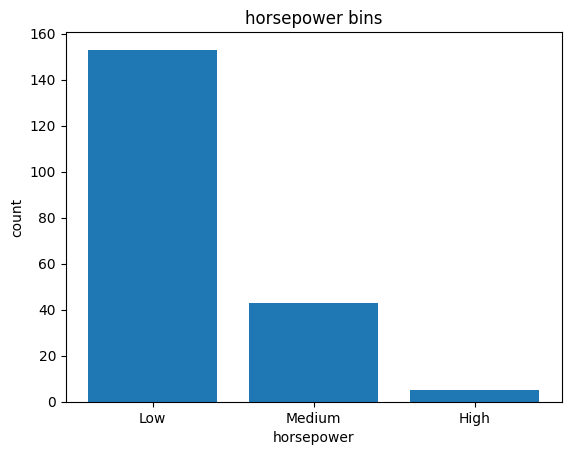

In [44]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h3>Bins Visualization</h3>
Normally, you use a histogram to visualize the distribution of bins we created above.


Text(0.5, 1.0, 'horsepower bins')

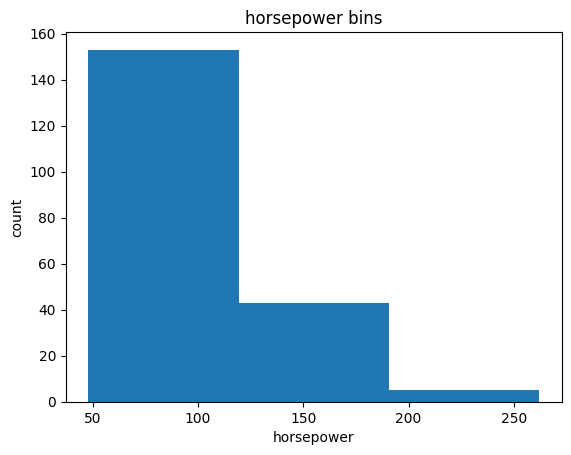

In [45]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Indicator Variable
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.
</p>

<b>Why use indicator variables?</b>
<p>
    You use indicator variables so you can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.
</p>

<p>
    Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type.
</p>


In [46]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [47]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [48]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [49]:
#In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [50]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,False,True


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "aspiration"</b>
</div>


In [51]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [52]:
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [53]:
#In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)

In [54]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


In [55]:
df.to_csv('clean_df.csv')

#Project 2: Laptop Price

# Objectives

After completing this lab you will be able to:

 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# Instead of using pyodide to download the data, use the requests library
import requests

def download(url, filename):
    """Downloads a file from a URL and saves it to a local file."""
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    with open(filename, "wb") as f:
        f.write(response.content)

In [90]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [91]:
download(file_path, "laptops.csv")
file_name="laptops.csv"

In [92]:
df=pd.read_csv(file_name, header=0)

In [93]:
#dataframe summery

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [94]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [95]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data.


In [96]:
df.isnull()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,False,False,False,False,False,False,False,False,False,False,False,False,False
234,False,False,False,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False,False,False,False


In [97]:
df.isnull().sum()

,0
Unnamed: 0,0
Manufacturer,0
Category,0
Screen,0
GPU,0
OS,0
CPU_core,0
Screen_Size_cm,4
CPU_frequency,0
RAM_GB,0


# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [98]:
avg_weight_kg= df["Weight_kg"].astype("float").mean(axis=0)
print("Average of Weight_kg:", avg_weight_kg)

Average of Weight_kg: 1.8622317596566522


In [99]:
df['Weight_kg'].replace(np.nan, avg_weight_kg, inplace=True)

<ipython-input-99-bead85ec1a12>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].replace(np.nan, avg_weight_kg, inplace=True)


In [100]:
df.isnull().sum()

,0
Unnamed: 0,0
Manufacturer,0
Category,0
Screen,0
GPU,0
OS,0
CPU_core,0
Screen_Size_cm,4
CPU_frequency,0
RAM_GB,0


#Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.

In [101]:
df["Screen_Size_cm"].value_counts()

,count
Screen_Size_cm,
39.62,89
35.56,64
38.10,23
33.78,20
33.02,18
43.94,7
43.18,5
31.75,4
30.48,4


In [102]:
#The replacement procedure is very similar to what you have seen previously:
#replace the missing 'num-of-doors' values by the most frequent
df["Screen_Size_cm"].replace(np.nan, "39.62", inplace=True)

<ipython-input-102-8dcb7e136a65>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size_cm"].replace(np.nan, "39.62", inplace=True)


# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [103]:
df["Weight_kg"] = df["Weight_kg"].astype("float")
df["Screen_Size_cm"] = df["Screen_Size_cm"].astype("float")

# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [104]:
# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


SyntaxError: invalid syntax (<ipython-input-104-df09cd318518>, line 4)

In [105]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['Weight_kg'] = 2.205*df['Weight_kg']
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)



In [106]:
df['Screen_Size_cm'] = 2.54*df["Screen_Size_cm"]
df.rename(columns={'Screen_Size_cm':'Screen_Size_cm'}, inplace=True)
# check your transformed data
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,90.3224,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,100.6348,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,100.6348,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,85.8012,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,100.6348,1.8,8,256,4.21155,837


### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [107]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [108]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

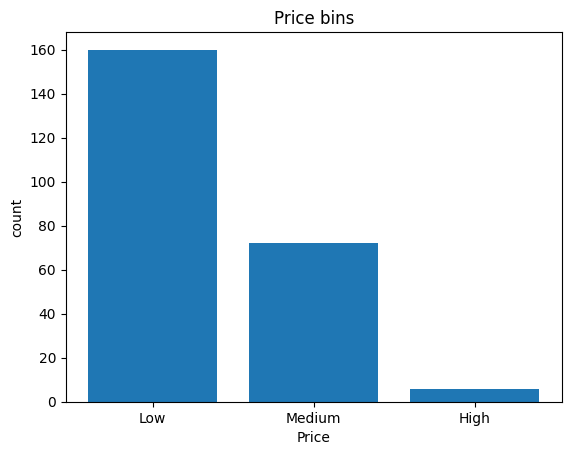

In [111]:
#Also, plot the bar graph of these bins.
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [112]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

KeyError: 'Screen'

In [113]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_cm  \
0           0         Acer         4    2   1         5         90.3224   
1           1         Dell         3    1   1         3        100.6348   
2           2         Dell         3    1   1         7        100.6348   
3           3         Dell         4    2   1         5         85.8012   
4           4           HP         4    2   1         7        100.6348   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  \
0       0.551724       8             256        3.52800    978          Low   
1       0.689655       4             256        4.85100    634          Low   
2       0.931034       8             256        4.85100    946          Low   
3       0.551724       8             128        2.69010   1244          Low   
4       0.620690       8             256        4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False              True 

In [87]:
df.to_csv('clean_laptop.csv')